
## 01MIAR - Actividad Video Valencia Pollution

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 27/06/2025 00:00 - 30/06/2025 23:59

#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- parámetros: parámetroe medidos
- mediciones: fichero de mediciones
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire
- fiwareid: 
- geo_shape: coordenadas geográficas
- geo_point_2d: latitud-longitud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## 01
Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame

In [2]:
df = pd.read_csv("valencia_pollution_dataset.csv")
df.sample(5)

,objectid,nombre,direccion,tipozona,parametros,mediciones,so2,no2,o3,co,pm10,pm25,tipoemision,fecha_carga,calidad_ambiental,fiwareid,geo_shape,geo_point_2d
107,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,NaN,NaN,0.0,8,70.0,0.7,7.0,2.0,Tráfico,2025-05-25T08:20:06+00:00,Razonablemente Buena,NaN,NaN,NaN
392,22,Centro,Plaza Ayuntamiento,Urbana,NaN,NaN,NaN,11,NaN,NaN,15.0,8.0,Tráfico,2025-05-26T10:20:10+00:00,Buena,NaN,NaN,NaN
24,430,Dr. Lluch,"Calle Dr. Lluch, 48",Urbana,NaN,NaN,NaN,1,NaN,NaN,24.0,9.0,Tráfico,2025-05-25T00:20:10+00:00,Razonablemente Buena,NaN,NaN,NaN
338,28,Viveros,Jardines de Viveros,Urbana,NaN,NaN,0.0,14,70.0,NaN,NaN,NaN,Fondo,2025-05-26T05:20:09+00:00,Razonablemente Buena,NaN,NaN,NaN
211,28,Viveros,Jardines de Viveros,Urbana,NaN,NaN,0.0,4,86.0,NaN,NaN,NaN,Fondo,2025-05-25T18:20:10+00:00,Razonablemente Buena,NaN,NaN,NaN


## 02
- ¿Cuál es el rango temporal del dataset?
- Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

In [3]:
df['timestamp'] = pd.to_datetime(df['fecha_carga'])
df_start_timestamp, df_end_timestamp = df["timestamp"].min(), df["timestamp"].max()

print("*** Dataset temporal range ***")
print(f"First data point collected on:{df_start_timestamp: %A, %B %d, %Y %H:%M:%S}")
print(f"Last data point collected on:{df_end_timestamp: %A, %B %d, %Y %H:%M:%S}")
print(f"Temporal range for the data collected: {df_end_timestamp - df_start_timestamp}")

*** Dataset temporal range ***
First data point collected on: Saturday, May 24, 2025 20:20:04
Last data point collected on: Monday, May 26, 2025 10:20:13
Temporal range for the data collected: 1 days 14:00:09


In [4]:
carbon_monoxide_summary = df.groupby(['objectid', 'nombre'])['co'].describe().dropna()

print("*** Number of measuring stations with carbon monoxide sensors ***")
print(f"{len(carbon_monoxide_summary)} stations")
print()

print("*** Summary of data for stations with carbon monoxide sensors ***")
print(carbon_monoxide_summary.dropna())

*** Number of measuring stations with carbon monoxide sensors ***
3 stations

*** Summary of data for stations with carbon monoxide sensors ***
                         count  mean           std  min  25%  50%  75%  max
objectid nombre                                                            
23       Francia          36.0   0.1  1.407465e-17  0.1  0.1  0.1  0.1  0.1
25       Molí del Sol     36.0   0.3  5.629858e-17  0.3  0.3  0.3  0.3  0.3
26       Pista de Silla   36.0   0.7  1.125972e-16  0.7  0.7  0.7  0.7  0.7


## 03

- Número de estación con la media más alta de mediciones de monóxido de carbono

*** Station with the highest average recorded for carbon monoxide ***
station_id =  26, station_name = 'Pista de Silla', average_cmo = 0.70


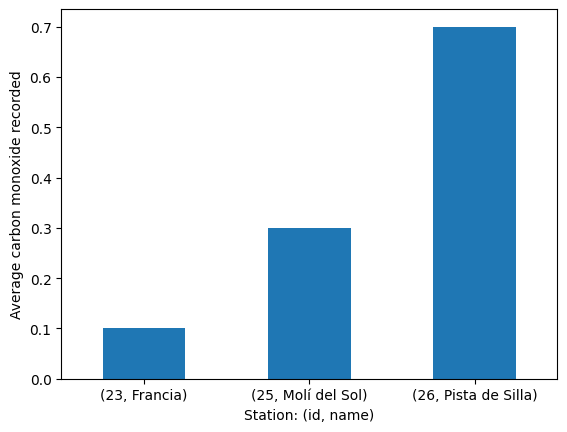

In [5]:
index_highest_average_cmo = np.argmax(carbon_monoxide_summary["mean"])
station_id, station_name = carbon_monoxide_summary.index[index_highest_average_cmo]
average_cmo = carbon_monoxide_summary["mean"].values[index_highest_average_cmo]

print("*** Station with the highest average recorded for carbon monoxide ***")
print(f"{station_id = : .0f}, {station_name = }, {average_cmo = :.2f}")

carbon_monoxide_summary["mean"].plot.bar()
plt.xticks(rotation = 0)
plt.xlabel('Station: (id, name)')
plt.ylabel('Average carbon monoxide recorded')
plt.show()

## 04
Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

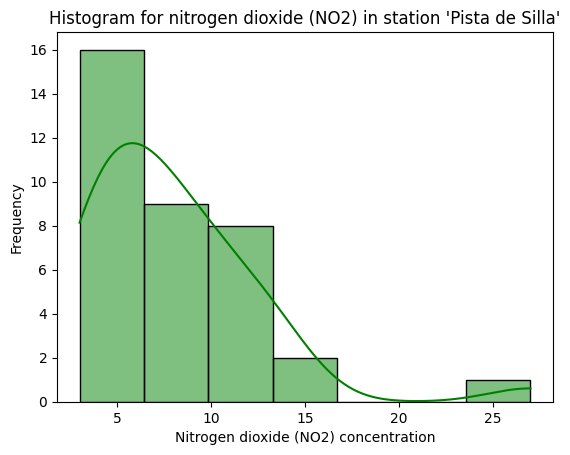

In [6]:
df_station_26 = df[df["objectid"] == 26]
sns.histplot(data = df_station_26, x = "no2", kde = True, color = "green")

plt.title("Histogram for nitrogen dioxide (NO2) in station 'Pista de Silla'")
plt.xlabel("Nitrogen dioxide (NO2) concentration")
plt.ylabel("Frequency")
plt.show()

## 05
Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

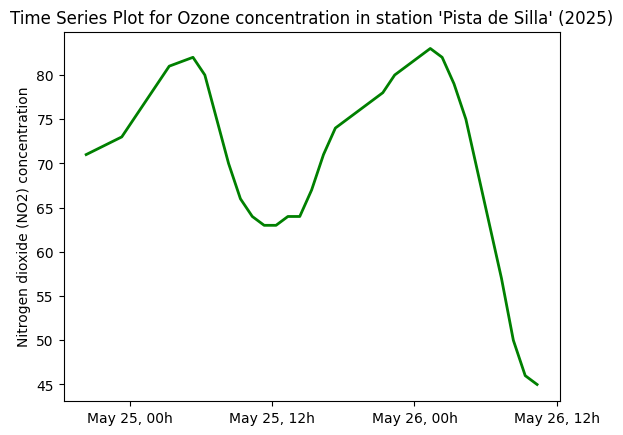

In [7]:
sns.lineplot(data = df_station_26, x = "timestamp", y = "o3", color = "green", linewidth = 2)

# Date format
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %d, %Hh'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval = 12))

plt.xticks(rotation = 0)
plt.title("Time Series Plot for Ozone concentration in station 'Pista de Silla' (2025)")
plt.xlabel(None)
plt.ylabel("Nitrogen dioxide (NO2) concentration")
plt.show()